.<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Optics - Chapter 4: Colorimetry**

---

# Colour in science package

In [ ]:
# Ver https://colour.readthedocs.io/en/develop/tutorial.html
%pip install colour-science

In [ ]:
import colour
import colour.plotting as cplot

# Funciones auxiliares (para pintar gráficos, etc.)

In [61]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.colors
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

def plot_spectra(wavelengths,spectra,xlabel,ylabel,path,pngname,**kwargs):
    import matplotlib
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

    ax.plot(wavelengths, spectra, color='darkred',label="Normalized spectra")

    ax.fill_between(wavelengths, 1, spectra, color='w')

    clim=(350,780)
    norm = plt.Normalize(*clim)
    wl = np.arange(clim[0],clim[1]+1,2)
    colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
    spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

    y = np.linspace(0, np.max(spectra), 100)
    X,Y = np.meshgrid(wavelengths, y)

    extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))
    ax.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    '''
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                    mode="expand", borderaxespad=0, ncol=2)
    '''
    fig.savefig(path+pngname+".png", dpi=220, facecolor="#f1f1f1")
    plt.show()
    pass

# CIE 1931 2-degree Standard Observer Colour Matching Functions (CMFs)


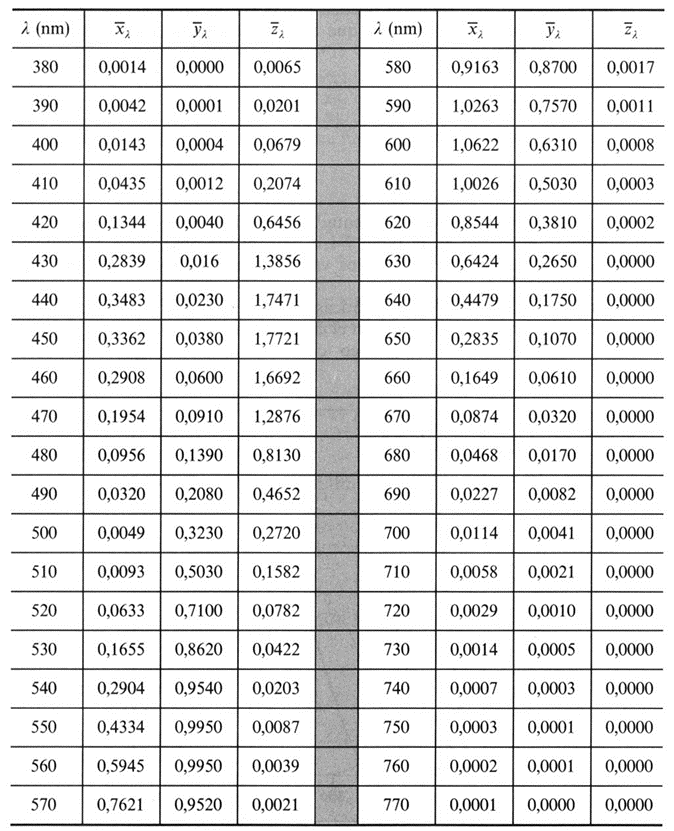

In [ ]:
# CIE 1931 2-degree Standard Observer (x, y, z) color matching functions data
# This data can be found in various sources and is typically provided as a table.
# labmbda from 380 to 775, step 5nm.
'''
for i in range(81):
    lambda_nm = 380 + (i * 5)
'''

cie_colour_match = [
        [0.0014,0.0000,0.0065], [0.0022,0.0001,0.0105], [0.0042,0.0001,0.0201],
        [0.0076,0.0002,0.0362], [0.0143,0.0004,0.0679], [0.0232,0.0006,0.1102],
        [0.0435,0.0012,0.2074], [0.0776,0.0022,0.3713], [0.1344,0.0040,0.6456],
        [0.2148,0.0073,1.0391], [0.2839,0.0116,1.3856], [0.3285,0.0168,1.6230],
        [0.3483,0.0230,1.7471], [0.3481,0.0298,1.7826], [0.3362,0.0380,1.7721],
        [0.3187,0.0480,1.7441], [0.2908,0.0600,1.6692], [0.2511,0.0739,1.5281],
        [0.1954,0.0910,1.2876], [0.1421,0.1126,1.0419], [0.0956,0.1390,0.8130],
        [0.0580,0.1693,0.6162], [0.0320,0.2080,0.4652], [0.0147,0.2586,0.3533],
        [0.0049,0.3230,0.2720], [0.0024,0.4073,0.2123], [0.0093,0.5030,0.1582],
        [0.0291,0.6082,0.1117], [0.0633,0.7100,0.0782], [0.1096,0.7932,0.0573],
        [0.1655,0.8620,0.0422], [0.2257,0.9149,0.0298], [0.2904,0.9540,0.0203],
        [0.3597,0.9803,0.0134], [0.4334,0.9950,0.0087], [0.5121,1.0000,0.0057],
        [0.5945,0.9950,0.0039], [0.6784,0.9786,0.0027], [0.7621,0.9520,0.0021],
        [0.8425,0.9154,0.0018], [0.9163,0.8700,0.0017], [0.9786,0.8163,0.0014],
        [1.0263,0.7570,0.0011], [1.0567,0.6949,0.0010], [1.0622,0.6310,0.0008],
        [1.0456,0.5668,0.0006], [1.0026,0.5030,0.0003], [0.9384,0.4412,0.0002],
        [0.8544,0.3810,0.0002], [0.7514,0.3210,0.0001], [0.6424,0.2650,0.0000],
        [0.5419,0.2170,0.0000], [0.4479,0.1750,0.0000], [0.3608,0.1382,0.0000],
        [0.2835,0.1070,0.0000], [0.2187,0.0816,0.0000], [0.1649,0.0610,0.0000],
        [0.1212,0.0446,0.0000], [0.0874,0.0320,0.0000], [0.0636,0.0232,0.0000],
        [0.0468,0.0170,0.0000], [0.0329,0.0119,0.0000], [0.0227,0.0082,0.0000],
        [0.0158,0.0057,0.0000], [0.0114,0.0041,0.0000], [0.0081,0.0029,0.0000],
        [0.0058,0.0021,0.0000], [0.0041,0.0015,0.0000], [0.0029,0.0010,0.0000],
        [0.0020,0.0007,0.0000], [0.0014,0.0005,0.0000], [0.0010,0.0004,0.0000],
        [0.0007,0.0002,0.0000], [0.0005,0.0002,0.0000], [0.0003,0.0001,0.0000],
        [0.0002,0.0001,0.0000], [0.0002,0.0001,0.0000], [0.0001,0.0000,0.0000],
        [0.0001,0.0000,0.0000], [0.0001,0.0000,0.0000], [0.0000,0.0000,0.0000]
]



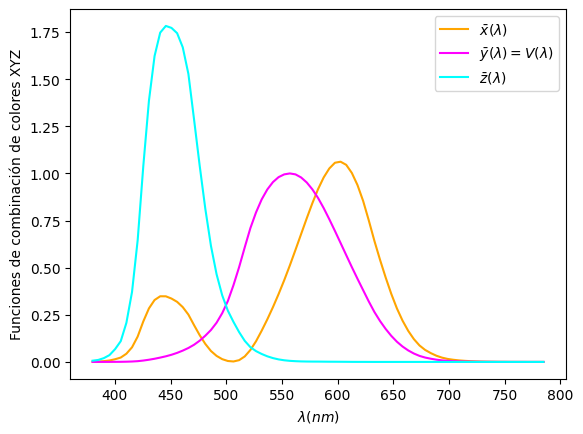

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
cie=np.array(cie_colour_match)

lambda_nm=np.linspace(380.0,380+81*5,81)
x_barra=cie[:,0]
y_barra=cie[:,1]
z_barra=cie[:,2]

plt.plot(lambda_nm,x_barra,label=r'$\bar x(\lambda)$',color='orange')
plt.plot(lambda_nm,y_barra,label=r'$\bar y(\lambda)=V(\lambda)$',color='magenta')
plt.plot(lambda_nm,z_barra,label=r'$\bar z(\lambda)$',color='cyan')

plt.xlabel(r'$\lambda (nm)$')
plt.ylabel('Funciones de combinación de colores XYZ')
plt.legend()
plt.show()


# Spectrum to $xyz$ coordinates

## Equation (1)

**Tristimulus values in XYZ system for a spectral distribution $I(\lambda)$**

$X=\Delta \lambda \sum_{\lambda_i}^{\lambda_f} \, \bar x(\lambda) I(\lambda)$

$Y=\Delta \lambda \sum_{\lambda_i}^{\lambda_f} \, \bar y(\lambda) I(\lambda)$

$Z=\Delta \lambda \sum_{\lambda_i}^{\lambda_f} \, \bar z(\lambda) I(\lambda)$



## Equation (2)

$x=X/(X+Y+Z)$

$y=Y/(X+Y+Z)$

$z=Z/(X+Y+Z)$

$z=1-(x+y)$

In [ ]:
import math
def spectrum_to_xyz(spec_intens):
    '''
    To determine the CIE XYZ coordinates of a given spectrum, we use Eqs. (1) to sum,
    across the visual spectrum, the products of the CIE colour matching functions and the
    power spectrum.
    The function argument can be the spectrum taking the wavelength as the argument.
    Since we're only interested in the colour of spectrum and not its absolute luminosity,
    we ignore the Δλ terms in Eqs. (1) as they cancel when we compute chromaticity coordinates with Eqs. (2).
    '''
    X, Y, Z = 0, 0, 0
    for i in range(81):
        lambda_nm = 380 + (i * 5)
        Me = spec_intens(lambda_nm)
        X += Me * cie_colour_match[i][0]
        Y += Me * cie_colour_match[i][1]
        Z += Me * cie_colour_match[i][2]
    XYZ = X + Y + Z
    x = X / XYZ
    y = Y / XYZ
    z = Z / XYZ
    return x, y, z

# Conversion from $xyz \leftarrow \rightarrow rgb$

$\begin{bmatrix}
    X \\
    Y \\
    Z \\
\end{bmatrix} = M \begin{bmatrix}
    R \\
    G \\
    B \\
\end{bmatrix}
$

Where
$
M = \begin{bmatrix}
    2.7689 & 1.7517 & 1.1302 \\
    1 & 4.5907 & 0.0601 \\
    0 & 0.0565 & 5.5943 \\
\end{bmatrix}
$

Tristimulus values $XYZ$ CIE 1931 color system

$x=\dfrac{X}{X+Y+Z}$

$y=\dfrac{Y}{X+Y+Z}$

$z=\dfrac{Z}{X+Y+Z}=1-x-y$


In [ ]:
def rgb_to_xyz(r,g,b):
  M=np.array([[2.7689,1.7517,1.1302],
              [1.0,4.5907,0.0601],
              [0.0,0.0565,5.5943]])
  rgb=np.array([r,g,b])
  XYZ=M@rgb
  sum_XYZ=np.sum(XYZ)
  xyz=XYZ/sum_XYZ
  return xyz[0],xyz[1],xyz[2] # x, y, z

def xyz_to_rgb(x, y, z):
  M=np.array([[2.7689,1.7517,1.1302],
             [1.0,4.5907,0.0601],
             [0.0,0.0565,5.5943]])
  M_inv = np.linalg.inv(M)
  xyz=np.array([x,y,z])
  RGB=M_inv@xyz
  sum_RGB=np.sum(RGB)
  rgb=RGB/sum_RGB
  return rgb[0],rgb[1],rgb[2] # r, g, b

## Example: convert RGB primaries to xyz coordinates

+ R= (0.7355, 0.2645)
+ G= (0.2658, 0.7243)
+ B= (0.1669, 0.0085)

In [ ]:
r=1;g=0;b=0
print(rgb_to_xyz(r,g,b))
r=0;g=1;b=0
print(rgb_to_xyz(r,g,b))
r=0;g=0;b=1
print(rgb_to_xyz(r,g,b))

(0.73467059354188224, 0.26532940645811776, 0.0)
(0.27375017581146766, 0.71742018159371146, 0.0088296425948209863)
(0.16658314417946529, 0.0088582967308315896, 0.82455855908970321)


# Colour of Black Body Radiation

For a ideal black body at temperature T (degrees kelvin), the spectral radiance at a given wavelength λ (metres) is calculated by Planck's radiation law:

Energy density (as a function of frequency):
$\hat W_T(\nu) \, d\nu=\dfrac{8\pi h \nu^3}{c^3}\dfrac{d\nu}{e^{h\nu/K_B T}-1}$

Power emitted through a surface $S$: $P(\nu)=c S \,\hat W_T(\nu) $

Energy density (as a function of the wavelength):
$\hat W_T(\nu) \, d\nu = -\hat W_T(\lambda) \, d\lambda  $



**Energy Density:** From this statistical analysis, Planck derived an expression for the energy density $\hat W_T(\lambda, T)$ , which describes the energy per unit volume per unit wavelength interval for a blackbody at temperature $T$ as a function of wavelength $\lambda$:

   $$\hat W_T(\lambda, T) \, d\lambda= \frac{{8\pi hc}}{{\lambda^5}} \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}\, d\lambda$$

   Where:
   - $h$ is Planck's constant.
   - $c$ is the speed of light.
   - $k$ is Boltzmann's constant.
   - $T$ is the temperature in Kelvin.

**Spectral Radiance:** The spectral radiance $B(\lambda, T)$ is related to the energy density and is essentially the amount of energy radiated per unit time, per unit area, per unit solid angle, and per unit wavelength. Planck's law for spectral radiance can be derived from the energy density formula, and it is given as:

   $$B(\lambda, T) = \frac{{2hc^2}}{{\lambda^5}} \frac{1}{{e^{\frac{{hc}}{{\lambda kT}}} - 1}}$$

   This equation represents Planck's law for blackbody radiation, which describes the spectral radiance of a blackbody at a given temperature as a function of wavelength. It is a fundamental equation in quantum physics and has been instrumental in understanding the behavior of electromagnetic radiation and the development of quantum mechanics.

In [51]:
import numpy as np
# Constants
kB = 1.380649e-23  # Boltzmann constant in J/K
T_room = 298.15    # Room temperature in Kelvin
h = 6.62607015e-34  # Planck constant in J·s
c = 299792458.0 # speed of light in vacuum (m/s)

def blackbody_spectral_radiance(T):
    def bb_emittance(wavelength_nm):
      '''
      B(lambda,T) : energy radiated per unit time, per unit area,
                    per unit solid angle, and per unit wavelength
      '''
      wlm = wavelength_nm * 1e-9  # Wavelength in meters
      c1=2.0*h*c**2
      c2=h*c/kB
      return (c1* math.pow(wlm, -5.0)) / (math.exp(c2/ (wlm * T)) - 1.0)
    return bb_emittance

def gaussian_wavepacket(wl0_nm,delta_nm):
    def bb_emittance(wavelength_nm):
      '''
      Gaussian
      '''
      wlm = wavelength_nm * 1e-9  # Wavelength in meters
      return np.exp(-(wlm-wl0_nm)**2/delta_nm**2)
    return bb_emittance

# Gaussian wavepacket

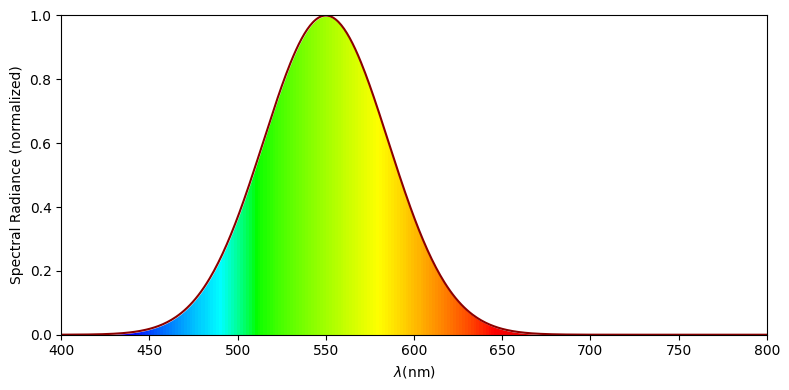

In [62]:
import numpy as np
import math
wavelengths=np.linspace(400.0,800,500)
wl0_nm=550.0*1e-9
delta_nm=50.01e-9
spec_T=gaussian_wavepacket(wl0_nm,delta_nm)
spectra=[]
for wl in wavelengths:
    spectra.append(spec_T(wl))

plot_spectra(wavelengths,spectra/np.max(spectra),xlabel='$\lambda$(nm)',ylabel='Spectral Radiance (normalized)',path='./',
            pngname='spectra')

## Plot black body spectral radiance for a given $T$

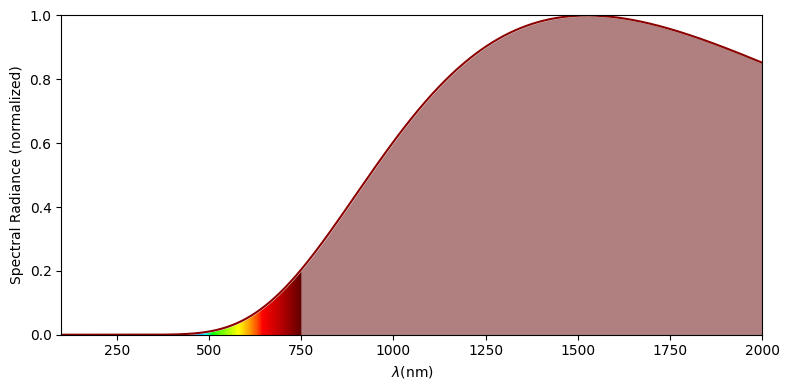

In [21]:
import numpy as np
import math
wavelengths=np.linspace(100.0,2000,1000)
T=1900.0 # Kelvin
spec_T=blackbody_spectral_radiance(T)
spectra=[]
for wl in wavelengths:
    spectra.append(spec_T(wl))
#print(wavelengths)
#print(spectra)

plot_spectra(wavelengths,spectra/np.max(spectra),xlabel='$\lambda$(nm)',ylabel='Spectral Radiance (normalized)',path='./',
            pngname='spectra')

Black body radiator temperature approximation of various illuminants
---
**Source	(Temperature, K)**
+ Candle flame	1900
+ Sunlight at sunset	2000
+ Tungsten bulb—60 watt	2800
+ Tungsten bulb—200 watt	2900
+ Tungsten/halogen lamp	3300
+ Carbon arc lamp	3780
+ Sunlight plus skylight	5500
+ Xenon strobe light	6000
+ Overcast sky	6500
+ North sky light	7500

## The temperatures and colors of stars (figure seen from the earth where blue is partially scattered by the atmosphere)

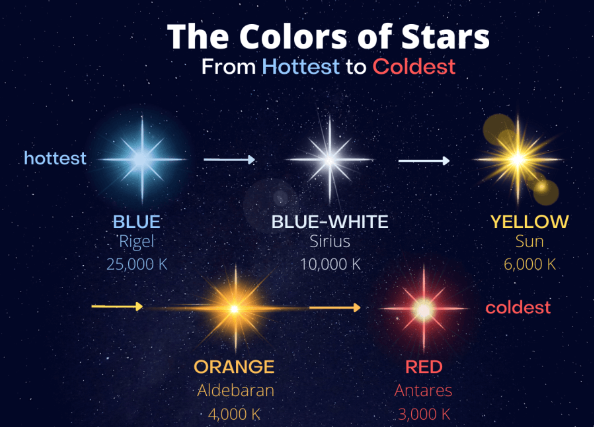

## $xyz$ and $rgb$ coordinates for several stars (temperatures)

In [ ]:
print("Temperature (K)      x      y      z      r    g    b")
print("-----------    ------ ------ ------   ----- ----- -----")

xyT = []
rgb=[]
T_stars=[3000.0,4000.0,6000.0,10000.,25000]
T_star_names=['Antares','Aldebaran','Sun','Sirius','Rigel']
for T in T_stars:
    x, y, z = spectrum_to_xyz(blackbody_spectral_radiance(T))
    xyT.append([x,y,T])
    r,g,b = xyz_to_rgb(x, y, z)
    rgb.append([r,g,b])
    print(round(T,4), round(x,4), round(y,4), round(z,4),
                      round(r,3), round(g,3), round(b,3))

Temperature (K)      x      y      z      r    g    b
-----------    ------ ------ ------   ----- ----- -----
3000.0 0.4369 0.4041 0.159 0.533 0.327 0.14
4000.0 0.3804 0.3768 0.2428 0.426 0.345 0.229
6000.0 0.3221 0.3318 0.3461 0.306 0.343 0.351
10000.0 0.2807 0.2883 0.431 0.216 0.324 0.46
25000 0.2525 0.2523 0.4951 0.153 0.301 0.546


## CIE 1931 XYZ Chromaticity Diagram

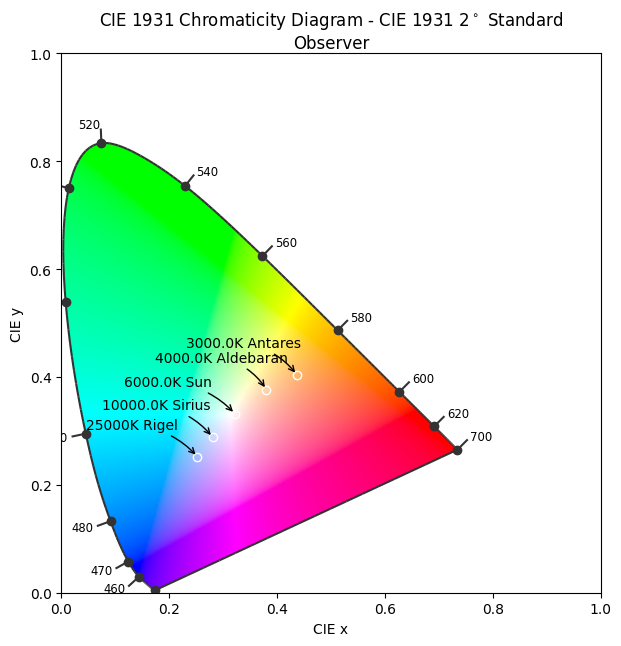

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'CIE 1931 Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='CIE x', ylabel='CIE y'>)

In [ ]:
import matplotlib.pyplot as plt
xy = xyT
# Plotting the *CIE 1931 Chromaticity Diagram*.
# The argument *show=False* is passed so that the plot doesn't get
# displayed and can be used as a basis for other plots.
cplot.plot_chromaticity_diagram_CIE1931(show=False)

# Plotting the *CIE xy* chromaticity coordinates.
for i in range(0,len(xy)):
  xy_=xy[i]
  #print(xy_)
  x, y,T = xy_
  xy_=[x,y]
  #print(x,y)
  plt.plot(x, y, "o-", color="white", mfc='none')
  # Annotating the plot.
  plt.annotate(
      str(T)+"K "+T_star_names[i],
      xy=xy_,
      xytext=(-80, 20),
      textcoords="offset points",
      arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-0.2"),
  )

# Displaying the plot.
cplot.render(
    show=True,
    limits=(-0.1, 0.9, -0.1, 0.9),
    x_tighten=True,
    y_tighten=True,
)